# Data Collection and Signal Processing

# Getting in Data - Analog to Digital Converters

To discuss some of the basic considerations involved when converting a continuous process into a sampled, quantized process.

Many physiological signals are continuous function of time. In order to analyze such processes with a computer, it is necessary to convert the process into a series of numbers by digitizing it.

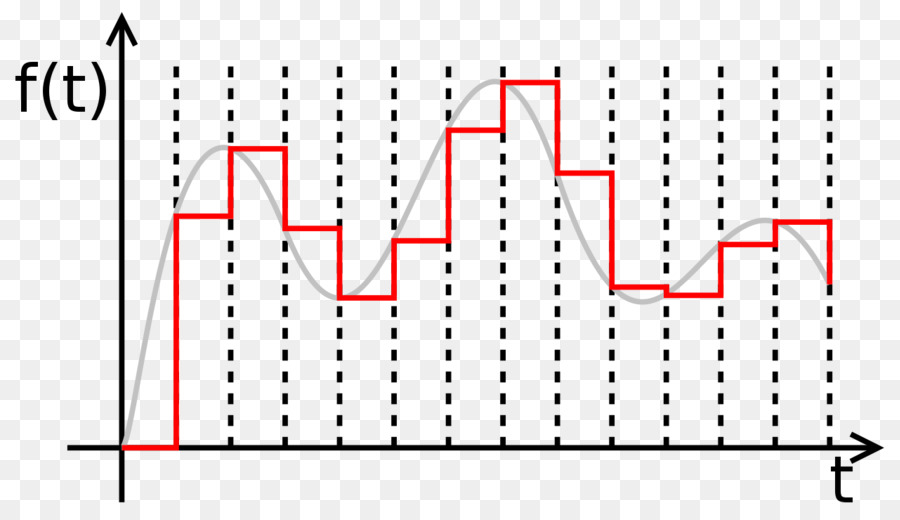

This procedure consists of two parts: sampling and quantization.

The first part, sampling, defines the points at which the data are observed.The second part, quantization, deals with the procedure of converting the analog signal (e.g. voltage, force, etc.) into digital form.

# Sampling

It is important to select an appropriate sampling rate. The signal must be sampled often enough to describe the high frequency information in the signal.

The Shannon-Nyquist sampling theorem provides a means of determining an appropriate sampling rate.This theorem states that in order to adequately describe a signal it must be sampled at a frequency that is at least twice that of its highest frequency component.

In [ ]:
https://en.wikipedia.org/wiki/Sampling_(signal_processing)

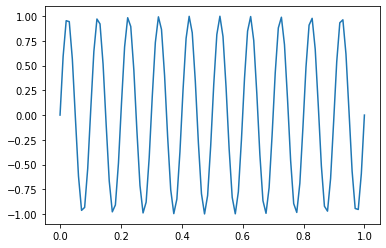

In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt

time = np.linspace(0, 1, 100)
freq = 10
amplitude = np.sin(2*np.pi*time*freq)
plt.plot(time,amplitude)
plt.show()



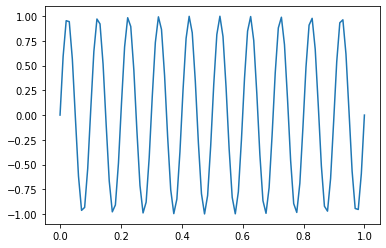

In [24]:
time = np.linspace(0, 1, 100)
time2 = np.linspace(0, 1, 10)
freq = 10
amplitude = np.sin(2*np.pi*time*freq)
amplitude2 = np.sin(2*np.pi*time2*freq)
plt.plot(time,amplitude)
# plt.plot(time2,amplitude2, color = 'red')
plt.show()

Quantization

Quantization replaces each real number with an approximation from a finite set of discrete values. Most commonly, these discrete values are represented as fixed-point words. Though any number of quantization levels is possible, common word-lengths are 8-bit (256 levels), 16-bit (65,536 levels) and 24-bit (16.8 million levels). 

In [ ]:
https://en.wikipedia.org/wiki/Quantization_(signal_processing)

Lets look at a example with a 2-bit quantization level (4 levels)

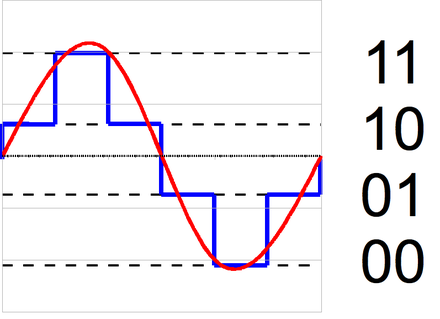

Lets look at a example with a 3-bit quantization level (8 levels)

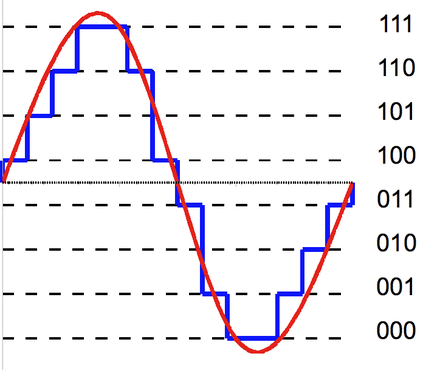

Now lets play with a more practice example:

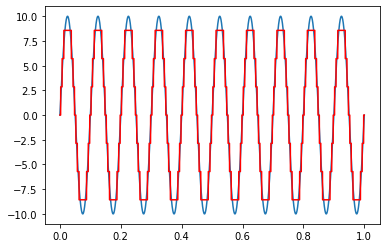

In [26]:
time = np.linspace(0, 1, 100000)
freq = 10
max1 = 10
min1 = -10
amplitude = 10*np.sin(2*np.pi*time*freq)
bits = 3
change1 = (max1-min1)/(2**bits - 1)
plt.plot(time,amplitude)
plt.plot(time, change1*np.round(amplitude/change1), 'r')
plt.show()

# Data Types

Integers and floats - Integers and floats are two different kinds of numerical data. An integer (more commonly called an int) is a number without a decimal point. A float is a floating-point number, which means it is a number that has a decimal place. Floats are used when more precision is needed.

Integer: Positive or negative whole numbers (without a fractional part)

In [4]:
#in python an int can be cast using the int() function
number = 4.0
int_number = int(number)
print(number)
print(int_number)


4.0
4


    Type      Capacity

   Int16 -- (-32,768 to +32,767)

   Int32 -- (-2,147,483,648 to +2,147,483,647)

   Int64 -- (-9,223,372,036,854,775,808 to +9,223,372,036,854,775,807)

Float: Any real number with a floating point representation in which a fractional component is denoted by a decimal symbol or scientific notation

In [5]:
#in python an int can be cast using the float() function
number = 4.0
int_number = int(number)
float_number = float(number)
print(int_number)
print(float_number)

4
4.0


Complex number: A number with a real and imaginary component represented as x+yj. x and y are floats and j is -1(square root of -1 called an imaginary number)

In [6]:
# Python code to demonstrate the working of 
# complex(), real() and imag() 
  
# importing "cmath" for complex number operations 
import cmath 
  
# Initializing real numbers 
x = 5
y = 3
  
# converting x and y into complex number 
z = complex(x,y); 
  
# printing real and imaginary part of complex number 
print ("The real part of complex number is : ",end="") 
print (z.real) 
  
print ("The imaginary part of complex number is : ",end="") 
print (z.imag)


The real part of complex number is : 5.0
The imaginary part of complex number is : 3.0


Boolean

Data with one of two built-in values True or False. Notice that 'T' and 'F' are capital. true and false are not valid booleans and Python will throw an error for them.

In [7]:
print(10 > 9)
print(10 == 9)
print(10 < 9)

#The bool() function allows you to evaluate any value, and give you True or False in return,
x = "Hello"
y = -15

print(bool(x))
print(bool(y))

True
False
False
True
True


String: A string value is a collection of one or more characters put in single, double or triple quotes.

In [8]:
a = "Hello"
print(a)

Hello


List : A list object is an ordered collection of one or more data items, not necessarily of the same type, put in square brackets.

Tuple: A Tuple object is an ordered collection of one or more data items, not necessarily of the same type, put in parentheses.

In [9]:
#we are familiar but variable = []

fruits = ["apple", "orange","pear"]

fruits_tuple =("apple","orange","pear")

print(fruits)
print(fruits_tuple)

['apple', 'orange', 'pear']
('apple', 'orange', 'pear')


Dictionary

A dictionary object is an unordered collection of data in a key:value pair form. A collection of such pairs is enclosed in curly brackets.

In [10]:
dict1 = {'Name': 'Zara', 'Age': 7, 'Class': 'First'}
print("dict['Name']: ", dict1['Name'])
print("dict['Age']: ", dict1['Age'])

dict['Name']:  Zara
dict['Age']:  7


In [11]:
#We can find out the type of something using type()

type(dict1) 

dict

# Time and Frequency Domain

In [ ]:
https://en.wikipedia.org/wiki/Frequency_domain

The Fourier transform (FT) decomposes a function of time (a signal) into its constituent frequencies

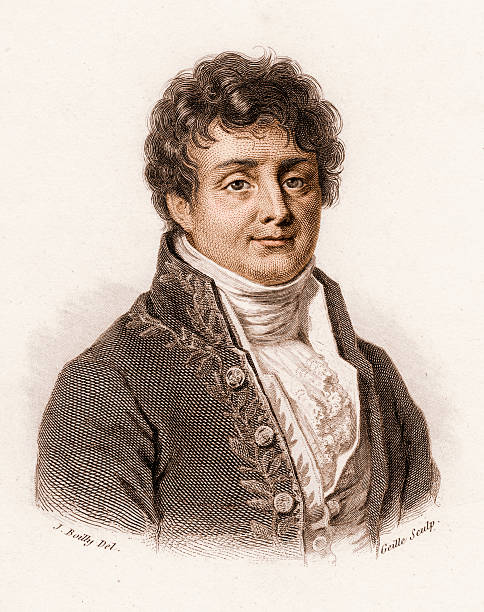

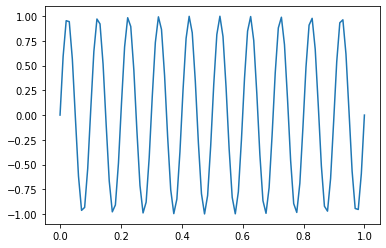

In [12]:
#Time Domain
f_s = 100
time = np.linspace(0, 1, f_s)
freq = 10
amplitude = np.sin(2*np.pi*time*freq)
plt.plot(time,amplitude)
plt.show()



[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35.
 36. 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49.]


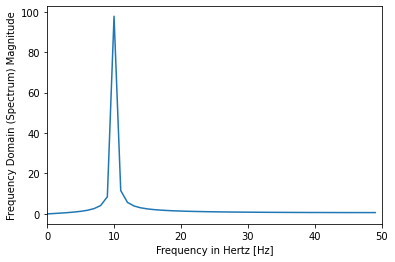

In [13]:
#Frequency Domain
from scipy import fftpack
len1 = len(amplitude)
X = fftpack.fft(amplitude)
freqs = fftpack.fftfreq(len1) * f_s
print(freqs[0:int(len1/2)])

plt.plot(freqs[0:int(len1/2)], 2*np.abs(X)[0:int(len1/2)])
plt.xlabel('Frequency in Hertz [Hz]')
plt.ylabel('Frequency Domain (Spectrum) Magnitude')
#plt.xlim(0, f_s/4)
plt.xlim(0, f_s/2)
plt.show()


Lets try another example

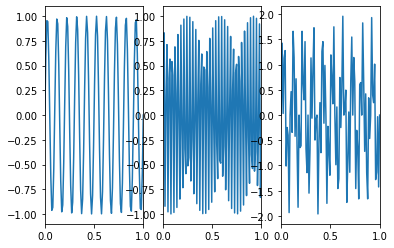

In [14]:
#Time Domain

fig, axs = plt.subplots(1, 3)
f_s = 100
time = np.linspace(0, 1, f_s)
freq1 = 10
amplitude1 = np.sin(2*np.pi*time*freq1)
freq2 = 34
amplitude2 = np.sin(2*np.pi*time*freq2)

axs[0].plot(time,amplitude1)
axs[1].plot(time,amplitude2)
axs[2].plot(time,amplitude2+amplitude1)

axs[0].set_xlim(0,1)
axs[1].set_xlim(0,1)
axs[2].set_xlim(0,1)
#axs[0].axis('square')
#axs[1].axis('square')
#axs[2].axis('square')

# fig.tight_layout()
# axs[1].set_xlabel('Frequency in Hertz [Hz]')
# axs[0].set_ylabel('Frequency Domain (Spectrum) Magnitude')
plt.show()



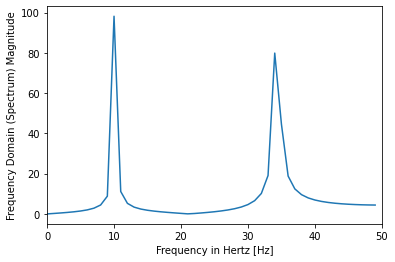

In [15]:
#Frequency Domain
from scipy import fftpack
len1 = len(amplitude1)
X = fftpack.fft(amplitude1+amplitude2)
freqs = fftpack.fftfreq(len1) * f_s
# print(freqs[0:int(len1/2)])

plt.plot(freqs[0:int(len1/2)], 2*np.abs(X)[0:int(len1/2)])
plt.xlabel('Frequency in Hertz [Hz]')
plt.ylabel('Frequency Domain (Spectrum) Magnitude')
#plt.xlim(0, f_s/4)
plt.xlim(0, f_s/2)
plt.show()



# Noise and Corruption

Noise is any unwanted signal recorded at the same time as a signal of interest. There are many common types of noise:

1 - Extraneous Noise arises when more than one signal is transduced by a recording device. Often the distinction between noise and signal will depend upon the particular application. 

2 - Power Noise or 60Hz noise is interference arising from capacitive and/or inductive coupling from 60Hz AC power signals. Although, its fundamental frequency will be 60Hz, power noise may often have important components at higher harmonics due to nonlinearities in the coupling mechanism.

3 - Thermal Noise arises from the thermal motion of electrons in conductors. It is always present and determines the theoretical minimum noise levels for a device. Thermal noise has a Gaussian distribution and is white.  That is, it has a flat or uniform frequency content with equal amounts of power distributed across each frequency band. 


In [ ]:
https://en.wikipedia.org/wiki/Noise_(signal_processing)

# Filters

Filters are often used to eliminate unwanted frequencies from an input signal or to select a desired frequency among many others. There are a wide range of types of filters and filter technologies.


In [ ]:
https://en.wikipedia.org/wiki/Filter_(signal_processing)

Two of the simplest filters are differentiation and integration:

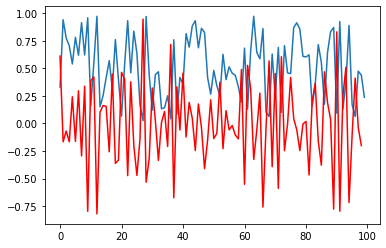

In [16]:
random_sig = np.random.rand(100)
differentiate = np.diff(random_sig)
plt.plot(random_sig)
plt.plot(differentiate, 'r')
plt.show()

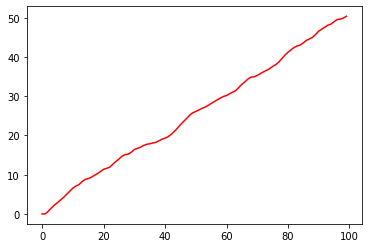

In [17]:
import scipy
result_trapz = []
for num,i in enumerate(random_sig):
    result_trapz.append(np.trapz(random_sig[0:num]))
plt.plot(result_trapz, 'r')
#plt.show()

# Other Filters

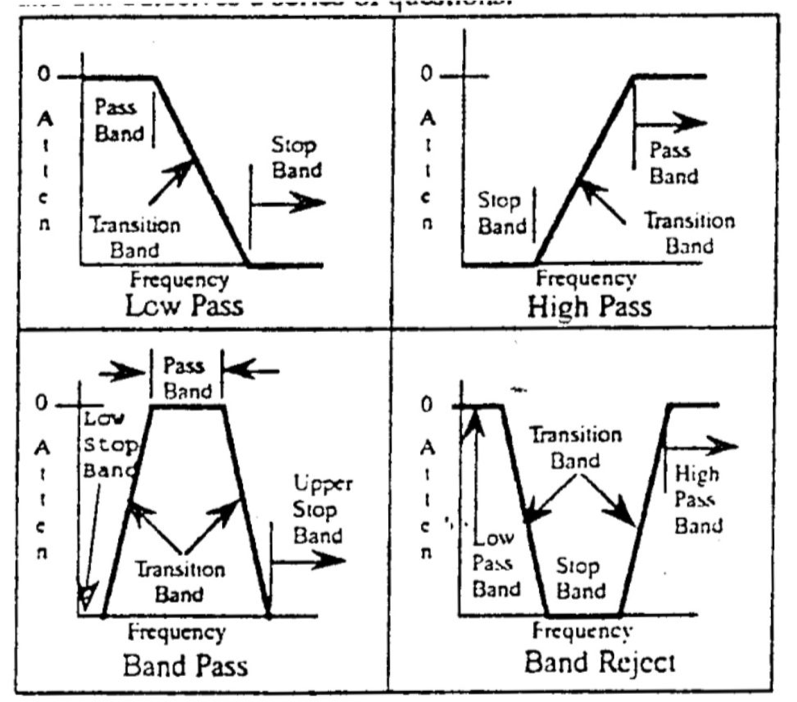

1 - A low-pass filter passes low frequencies.
2 - A high-pass filter passes high frequencies.
3 - A band-pass filter passes a limited range of frequencies.
4 - A band-reject filter passes all but a limited range of frequencies.

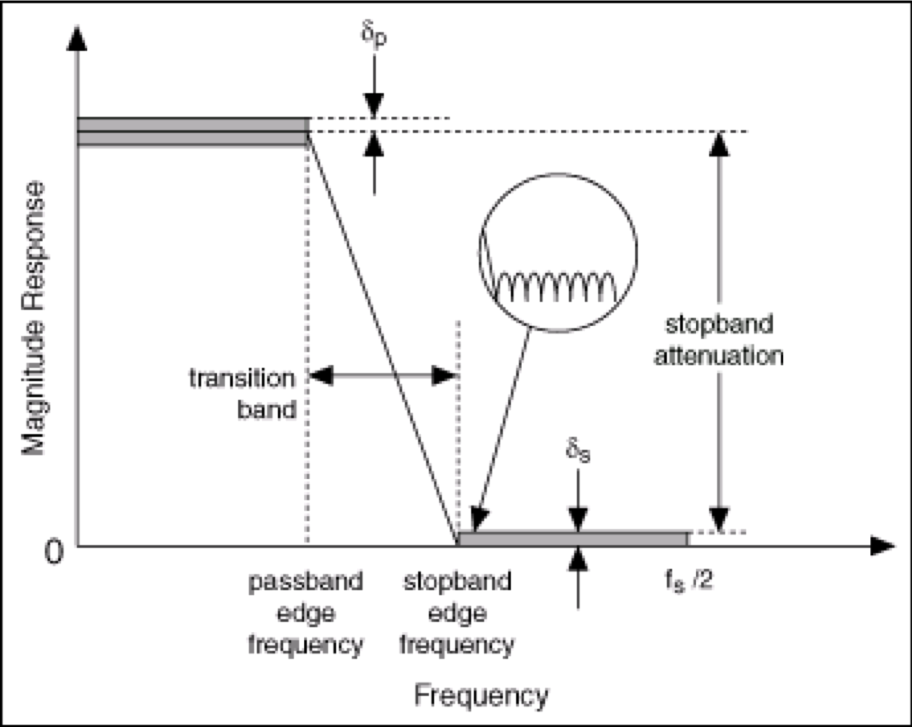

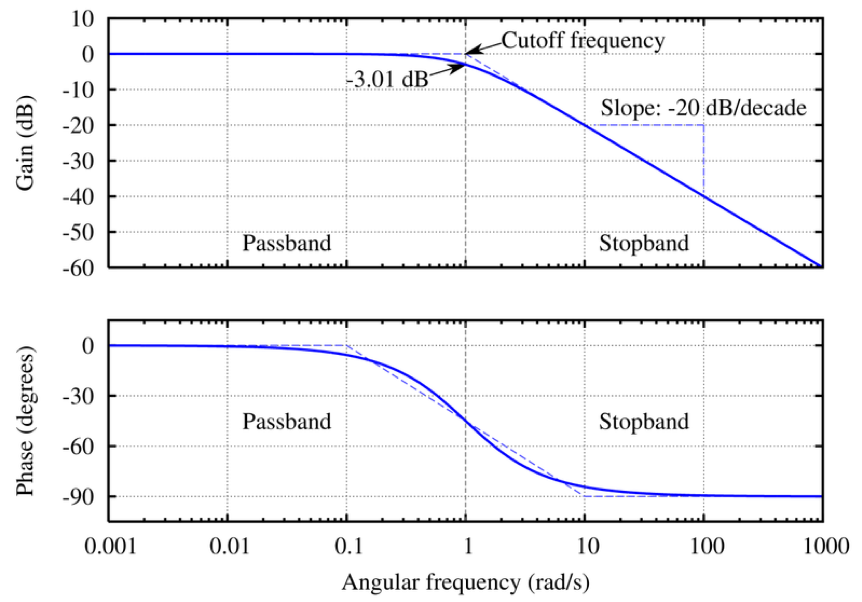

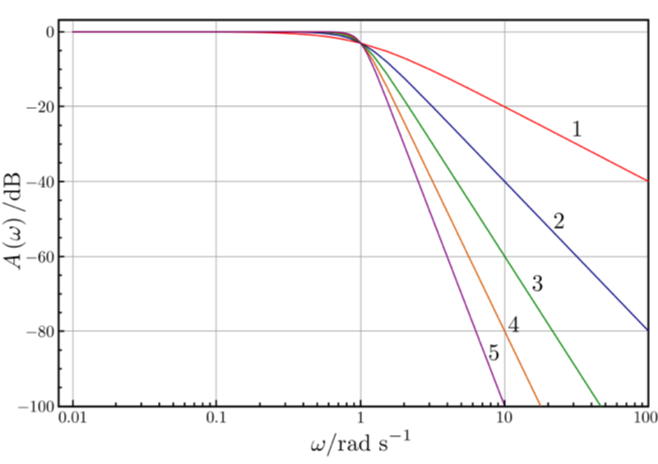

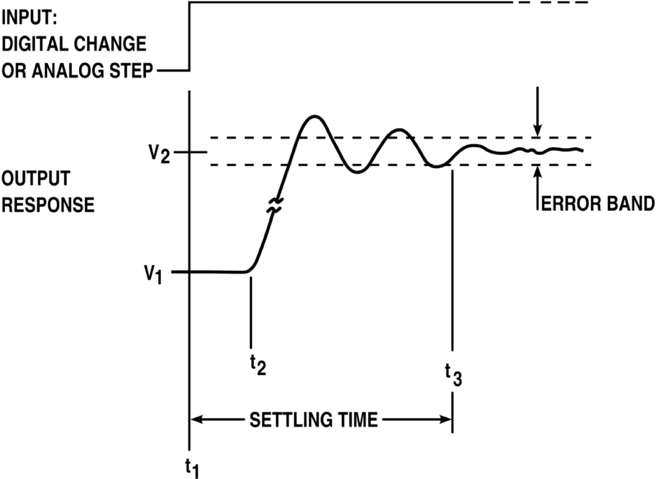

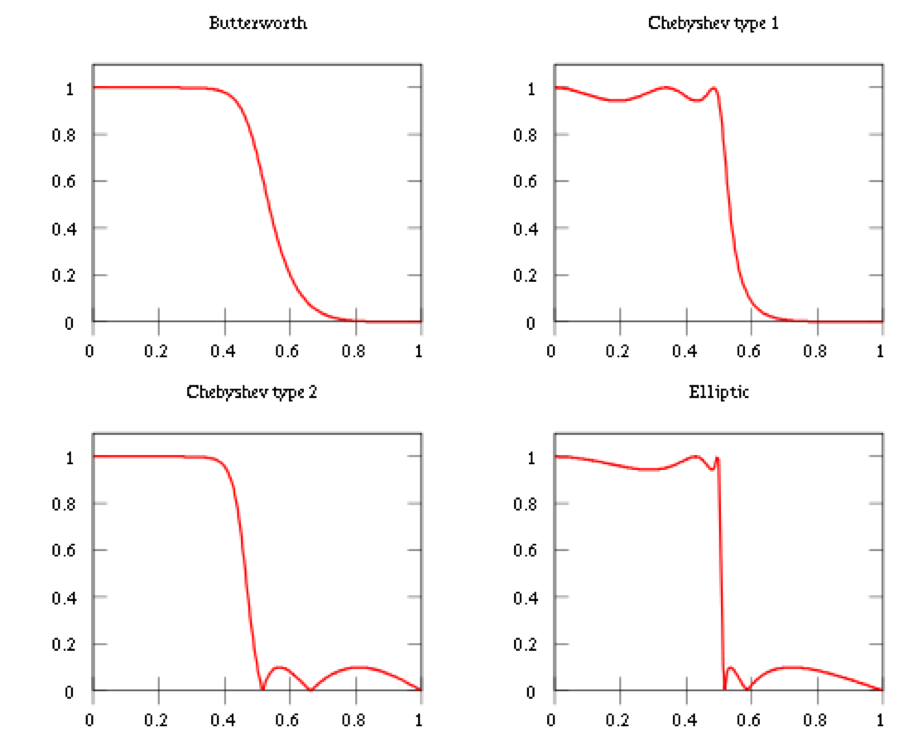

Lets try an example:

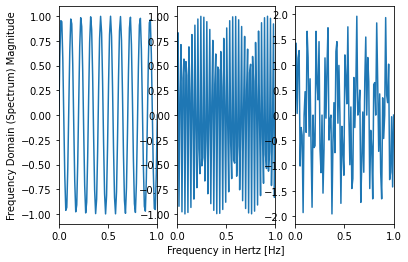

In [18]:
#Time Domain

fig, axs = plt.subplots(1, 3)
f_s = 100
time = np.linspace(0, 1, f_s)
freq1 = 10
amplitude1 = np.sin(2*np.pi*time*freq1)
freq2 = 34
amplitude2 = np.sin(2*np.pi*time*freq2)

axs[0].plot(time,amplitude1)
axs[1].plot(time,amplitude2)
axs[2].plot(time,amplitude2+amplitude1)

axs[0].set_xlim(0,1)
axs[1].set_xlim(0,1)
axs[2].set_xlim(0,1)
#axs[0].axis('square')
#axs[1].axis('square')
#axs[2].axis('square')

# fig.tight_layout()
axs[1].set_xlabel('Frequency in Hertz [Hz]')
axs[0].set_ylabel('Frequency Domain (Spectrum) Magnitude')
plt.show()



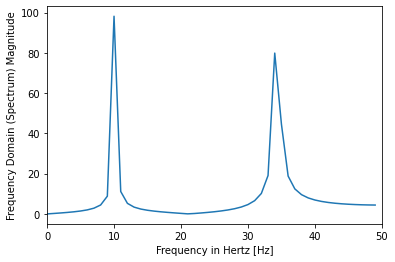

In [19]:
#Frequency Domain
from scipy import fftpack
len1 = len(amplitude1)
X = fftpack.fft(amplitude1+amplitude2)
freqs = fftpack.fftfreq(len1) * f_s
# print(freqs[0:int(len1/2)])

plt.plot(freqs[0:int(len1/2)], 2*np.abs(X)[0:int(len1/2)])
plt.xlabel('Frequency in Hertz [Hz]')
plt.ylabel('Frequency Domain (Spectrum) Magnitude')
#plt.xlim(0, f_s/4)
plt.xlim(0, f_s/2)
plt.show()


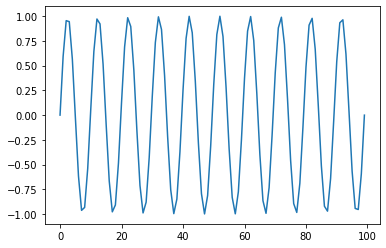

In [20]:
from scipy import signal
b, a = signal.butter(6,20/50, 'low')
y = signal.filtfilt(b, a, amplitude1+amplitude2)
plt.plot(y)

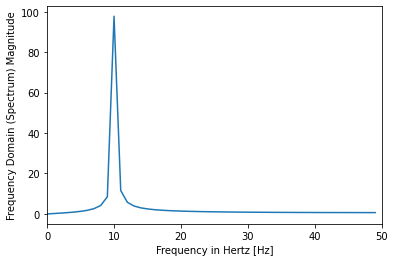

In [21]:
#Frequency Domain
from scipy import fftpack
len1 = len(y)
X = fftpack.fft(y)
freqs = fftpack.fftfreq(len1) * f_s
# print(freqs[0:int(len1/2)])

plt.plot(freqs[0:int(len1/2)], 2*np.abs(X)[0:int(len1/2)])
plt.xlabel('Frequency in Hertz [Hz]')
plt.ylabel('Frequency Domain (Spectrum) Magnitude')
#plt.xlim(0, f_s/4)
plt.xlim(0, f_s/2)
plt.show()



This isn't as complicated as it sounds, but if you still can't figure it out, i'll pass along some wisdom a self proclaimed brilliant person once told me:

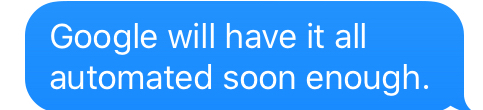